In [ ]:
# ! kaggle datasets download -d meirnizri/covid19-dataset

In [ ]:
# ! unzip /content/covid19-dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Covid Data.csv',parse_dates=["DATE_DIED"])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
data = df.copy()

In [ ]:
df.shape

(1048575, 21)

## Check duplicate values

In [ ]:
def print_unique(df):
    for i in df.columns:
        print(f'Column {i} has {df[i].nunique()} unique values')
print_unique(df)

Column USMER has 2 unique values
Column MEDICAL_UNIT has 13 unique values
Column SEX has 2 unique values
Column PATIENT_TYPE has 2 unique values
Column DATE_DIED has 401 unique values
Column INTUBED has 4 unique values
Column PNEUMONIA has 3 unique values
Column AGE has 121 unique values
Column PREGNANT has 4 unique values
Column DIABETES has 3 unique values
Column COPD has 3 unique values
Column ASTHMA has 3 unique values
Column INMSUPR has 3 unique values
Column HIPERTENSION has 3 unique values
Column OTHER_DISEASE has 3 unique values
Column CARDIOVASCULAR has 3 unique values
Column OBESITY has 3 unique values
Column RENAL_CHRONIC has 3 unique values
Column TOBACCO has 3 unique values
Column CLASIFFICATION_FINAL has 7 unique values
Column ICU has 4 unique values


In [ ]:
# nan (97,99) in binary features
# classification model to classify (infected or not)
# select appropriate features and FE ....
# split the data
# apply PCA
# perform different clasification techniques

In [ ]:
# replace the [1-3] and [4..] in classification feature
# [1-3] have covid
# [4-7] don't have covid


In [ ]:
# select the columns that contain nan values
nan_columns = df.columns[df.isin([97,99]).any()]
nan_columns

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ICU'], dtype='object')

In [ ]:
'''
Kmean
one-hot-encoding
normalizer, standard, etc
PCA
'''

'\nKmean\none-hot-encoding\nnormalizer, standard, etc\nPCA\n'

In [ ]:
def SOLVE(dff):
    df = dff.copy()
    df.loc[:,['INTUBED', 'PNEUMONIA']].replace({97: 1 , 99 : 2},inplace=True)
    df.CLASIFFICATION_FINAL.replace({1 : 1, 2 : 1, 3 : 1, 4 : 0 , 5 : 2 , 6 : 2 , 7 : 2},inplace=True)
    df["DEAD"] = (df["DATE_DIED"] == "9999-99-99").astype(int)
    df.drop(columns=["DATE_DIED"], inplace=True)
    df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
    df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
    df = df[(df.COPD == 1) | (df.COPD == 2)]
    df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
    df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
    df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
    df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
    df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
    df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
    df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
    df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

    df.drop_duplicates(inplace=True)

    df.drop(columns=["INTUBED",'PREGNANT', 'ICU'],inplace=True)
    print(df.columns)
    return df

In [ ]:
df['ICU'].replace({97: 1 , 99 : 2},inplace=True)
df.loc[:,'CLASIFFICATION_FINAL'].replace({0 : 1, 1 : 1, 2 : 1, 3 : 1, 4 : 0 , 5 : 2 , 6 : 2 , 7 : 2},inplace=True)
df["DEAD"] = (df["DATE_DIED"] == "9999-99-99").astype(int)
df.drop(columns=["DATE_DIED"], inplace=True)
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

df.drop_duplicates(inplace=True)
df.loc[:,'CLASIFFICATION_FINAL'].replace({0 : 1},inplace=True)

df.drop(columns=["INTUBED",'PREGNANT'],inplace=True)

In [ ]:
df_solved = df.copy()

In [ ]:
df_solved.shape

(172471, 19)

In [ ]:
df_solved.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

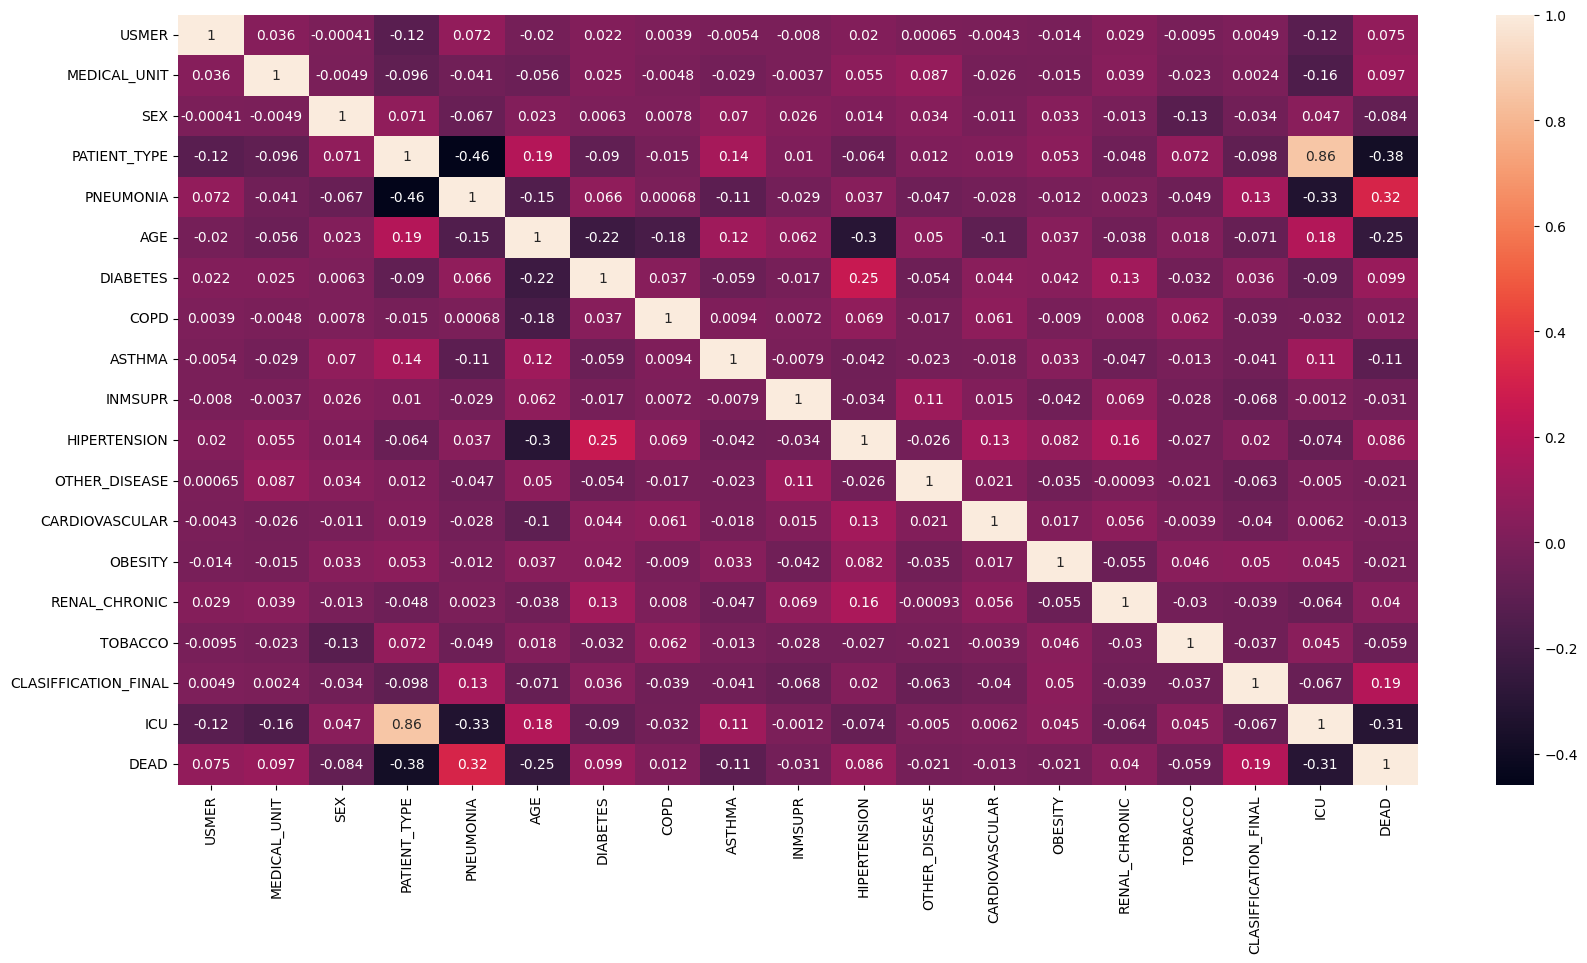

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_solved.corr(),annot=True)
plt.show()

In [ ]:
features = ['PATIENT_TYPE','ICU','PNEUMONIA','AGE','ASTHMA','CLASIFFICATION_FINAL','DEAD']
df[features].nunique()

PATIENT_TYPE              2
ICU                       2
PNEUMONIA                 2
AGE                     121
ASTHMA                    2
CLASIFFICATION_FINAL      2
DEAD                      2
dtype: int64

In [ ]:
df_solved.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,1,1,0
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,2,1,0
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,1,2,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,1,0
4,2,1,2,1,2,68,1,2,2,2,1,2,2,2,2,2,1,1,0


In [ ]:
# Min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_solved = scaler.fit_transform(df_solved)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_solved[:,:-1], df_solved[:,-1], test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137976, 18), (34495, 18), (137976,), (34495,))

In [ ]:
# logistic
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model4 = LogisticRegression(random_state=42)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")
f1 = f1_score(y_test, y_pred4)
print(f"F1 score: {f1}")
recall = recall_score(y_test, y_pred4)
print(f"Recall score: {recall}")
precision = precision_score(y_test, y_pred4)
print(f"Precision score: {precision}")
print("XGBoost F1 Score : ", f1_score(y_test, y_pred4,average=None))


Accuracy: 0.7676764748514278
F1 score: 0.849247554552295
Recall score: 0.8910863729669982
Precision score: 0.8111614201523645
XGBoost F1 Score :  [0.49374605 0.84924755]


In [ ]:
# randomforest

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1}")
f1 = f1_score(y_test, y_pred1)
print(f"F1 score: {f1}")
recall = recall_score(y_test, y_pred1)
print(f"Recall score: {recall}")
precision = precision_score(y_test, y_pred1)
print(f"Precision score: {precision}")
print("Random Forest F1 Score : ", f1_score(y_test, y_pred1,average=None))


Accuracy: 0.6961298738947673
F1 score: 0.7956804802931661
Recall score: 0.8057003000157903
Precision score: 0.7859068155564113
Random Forest F1 Score :  [0.40739484 0.79568048]


In [ ]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")
f1 = f1_score(y_test, y_pred3)
print(f"F1 score: {f1}")
recall = recall_score(y_test, y_pred3)
print(f"Recall score: {recall}")
precision = precision_score(y_test, y_pred3)
print(f"Precision score: {precision}")
print("Naive Bayes F1 Score : ", f1_score(y_test, y_pred3,average=None))


Accuracy: 0.7110885635599362
F1 score: 0.7806198820110944
Recall score: 0.6999447339333649
Precision score: 0.8823148885350318
Naive Bayes F1 Score :  [0.57703081 0.78061988]


In [ ]:
# xgboost

from xgboost import XGBClassifier
model4 = XGBClassifier(random_state=42)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")
f1 = f1_score(y_test, y_pred4)
print(f"F1 score: {f1}")
recall = recall_score(y_test, y_pred4)
print(f"Recall score: {recall}")
precision = precision_score(y_test, y_pred4)
print(f"Precision score: {precision}")
print("XGBoost F1 Score : ", f1_score(y_test, y_pred4,average=None))


Accuracy: 0.7821713291781418
F1 score: 0.8558935215373403
Recall score: 0.8808621506395073
Precision score: 0.8323013800820589
XGBoost F1 Score :  [0.55401235 0.85589352]


In [ ]:
# # svc
# from sklearn.svm import SVC

# model2 = SVC()
# model2.fit(X_train,y_train)
# y_pred2 = model2.predict(X_test)
# accuracy2 = accuracy_score(y_test, y_pred2)
# print(f"Accuracy: {accuracy2}")
# f1 = f1_score(y_test, y_pred2)
# print(f"F1 score: {f1}")
# recall = recall_score(y_test, y_pred2)
# print(f"Recall score: {recall}")
# precision = precision_score(y_test, y_pred2)
# print(f"Precision score: {precision}")
# print("SVM F1 Score : ", f1_score(y_test, y_pred2,average=None))
